In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import skimage, skimage.io
import torch
import torchvision
import torchxrayvision as xrv

In [3]:
img = xrv.utils.load_image('../tests/00027426_000.png')

In [4]:
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(320)])

img = transform(img)
img = torch.from_numpy(img).unsqueeze(0)

In [5]:
model = xrv.baseline_models.emory_hiti.RaceModel()
model.targets

['Asian', 'Black', 'White']

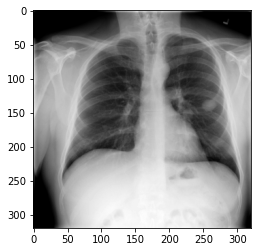

In [6]:
plt.imshow(img[0][0], cmap='gray');

In [7]:
with torch.no_grad():
    outputs = torch.softmax(model(img), 1)

In [8]:
dict(zip(model.targets,outputs.tolist()[0]))

{'Asian': 8.456485375063494e-06,
 'Black': 0.00020567238971125335,
 'White': 0.999785840511322}

In [9]:
model.targets[np.argmax(outputs.numpy())]

'White'

In [10]:
target = model.targets.index('White')

tensor([-0.0002], grad_fn=<SelectBackward0>)


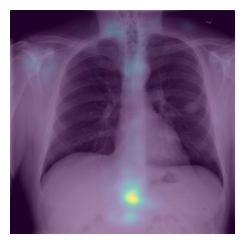

In [11]:
img = img.requires_grad_()

outputs = model(img)
print(outputs[:,target])
grads = torch.autograd.grad(outputs[:,target], img)[0][0][0]
blurred = skimage.filters.gaussian(grads.detach().cpu().numpy()**2, sigma=(5, 5), truncate=3.5)

my_dpi = 100
fig = plt.figure(frameon=False, figsize=(224/my_dpi, 224/my_dpi), dpi=my_dpi)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(img[0][0].detach().cpu().numpy(), cmap="gray", aspect='auto')
ax.imshow(blurred, alpha=0.5);